# GPs w. Uncertain Inputs

In [30]:
import os, sys
cwd = os.getcwd()
parent_dir = os.path.dirname(cwd)
sys.path.insert(0, parent_dir) 

import numpy as np
from uncertain import SparseGPR
import GPy
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
rng = np.random.RandomState(0)

# Generate sample data
noise = 1.0
input_noise = .3
n_train = 500
n_test = 10_000
X = 15 * rng.rand(n_train, 1)

def f(x): return np.sin(x)

y = f(X)

X += input_noise * rng.randn(X.shape[0], X.shape[1])
y += noise * (0.5 - rng.rand(X.shape[0], X.shape[1]))  # add noise
X_plot = np.linspace(0, 20, n_test)[:, None]
X_plot += input_noise * rng.randn(X_plot.shape[0], X_plot.shape[1])
X_plot = np.sort(X_plot, axis=0)

In [32]:
def plot_results():
    # Plot results
    plt.figure(figsize=(10, 5))
    lw = 2
    plt.scatter(X, y, c='k', label='data')
    plt.plot(X_plot, np.sin(X_plot), color='navy', lw=lw, label='True')

    plt.plot(X_plot, y_gpr, color='darkorange', lw=lw,
             label='GPR' )
    plt.fill_between(X_plot[:, 0], 
                     (y_gpr - 2*y_std).squeeze(), 
                     (y_gpr + 2*y_std).squeeze(), color='darkorange',
                     alpha=0.2)
    plt.xlabel('data')
    plt.ylabel('target')
    plt.xlim(0, 20)
    plt.ylim(-4, 4)
    plt.title('GPR versus Kernel Ridge')
    plt.legend(loc="best",  scatterpoints=1, prop={'size': 8})
    plt.show()

### Sparse GP Model - No Uncertain Inputs

In [55]:
n_inducing = 10
inference = 'vfe'
X_variance = None
verbose = 1
max_iters = 1_000
n_restarts = 0


gpr_clf = SparseGPR(
    verbose=verbose, 
    n_restarts=n_restarts,
    n_inducing=n_inducing,
    max_iters=max_iters,
    inference=inference,
    X_variance=X_variance
)

gpr_clf.fit(X, y);

Running Scaled Conjugate Gradients Code:
  runtime   i      f              |g|        
    00s07  0005   2.459115e+02   1.755042e+04 
    00s19  0014   2.282786e+02   9.225566e+01 
    01s12  0224   2.275165e+02   1.836048e-04 
Runtime:     01s12
Optimization status: converged - relative reduction in objective

Running Scaled Conjugate Gradients Code:
  runtime   i      f              |g|        
    00s12  0007   3.527655e+02   1.069869e+06 
    00s18  0012   2.398296e+02   6.724371e+03 
    00s28  0031   2.275165e+02   9.468401e-05 
Runtime:     00s28
Optimization status: converged - relative reduction in objective



{'inducing': <matplotlib.collections.PathCollection at 0x140245f28>,
 'dataplot': [<matplotlib.collections.PathCollection at 0x13efa69e8>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x13efa68d0>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x13efa61d0>]}

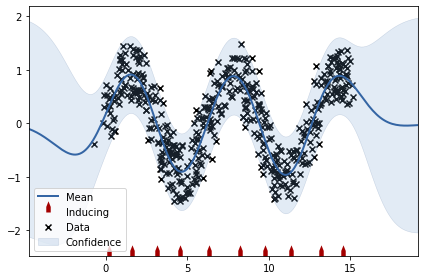

In [56]:
gpr_clf.gp_model.plot()

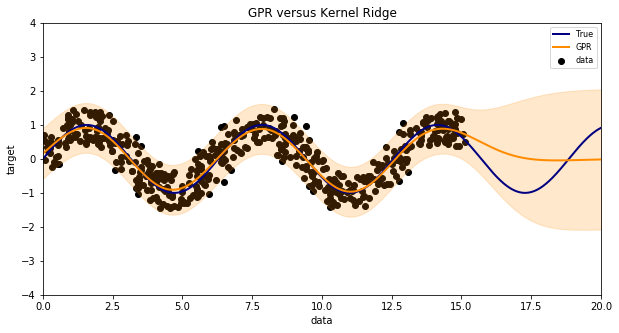

In [57]:
y_gpr, y_std = gpr_clf.predict(X_plot, return_std=True, noiseless=False)
plot_results()

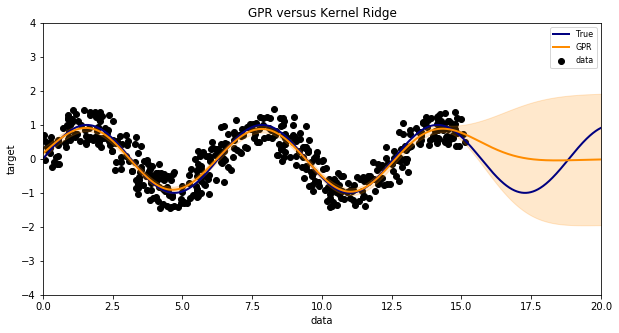

In [58]:
y_gpr, y_std = gpr_clf.predict(X_plot, return_std=True, noiseless=True)
plot_results()

### W. Uncertain Inputs

In [59]:
n_inducing = 10
inference = 'vfe'
X_variance = input_noise
verbose = 1
max_iters = 1_000
n_restarts = 0


gpr_clf = SparseGPR(
    verbose=verbose, 
    n_restarts=n_restarts,
    n_inducing=n_inducing,
    max_iters=max_iters,
    inference=inference,
    X_variance=X_variance
)

gpr_clf.fit(X, y);

Running Scaled Conjugate Gradients Code:
  runtime   i      f              |g|        
    00s04  0003   5.662663e+02   1.319557e+04 
    00s16  0011   3.701884e+02   9.087999e+02 
    00s18  0012   3.660772e+02   9.087999e+02 
    01s18  0182   3.628640e+02   5.660618e-03 
    02s02  0300   3.628581e+02   1.930820e-05 
Runtime:     02s02
Optimization status: converged - relative reduction in objective

Running Scaled Conjugate Gradients Code:
  runtime   i      f              |g|        
    00s10  0006   1.770042e+03   3.682809e+06 
    00s17  0010   4.196925e+02   4.232839e+05 
    00s19  0011   4.196925e+02   3.778471e+04 
    00s32  0031   3.628581e+02   1.859617e-05 
Runtime:     00s32
Optimization status: converged - relative reduction in objective



{'inducing': <matplotlib.collections.PathCollection at 0x13f90d550>,
 'dataplot': [<matplotlib.collections.PathCollection at 0x13f90da58>],
 'input_error': [<ErrorbarContainer object of 3 artists>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x13f90d898>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x13d103ef0>]}

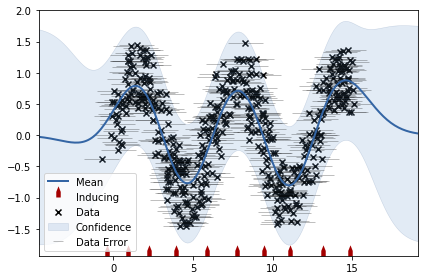

In [60]:
gpr_clf.gp_model.plot()

{'inducing': <matplotlib.collections.PathCollection at 0x13f093c50>,
 'gpmean': [[<matplotlib.lines.Line2D at 0x13f093f98>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x13f0a2400>]}

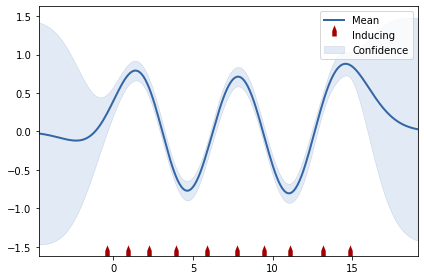

In [61]:
gpr_clf.gp_model.plot_f()

{'inducing': <matplotlib.collections.PathCollection at 0x13faaee80>,
 'gpmean': [[<matplotlib.lines.Line2D at 0x13fb321d0>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x13fb32630>]}

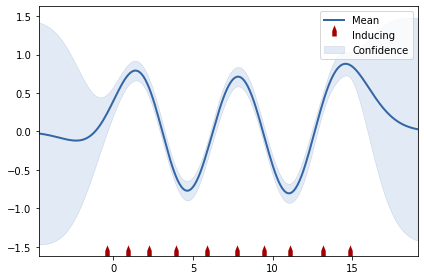

In [62]:
gpr_clf.gp_model.plot_latent()

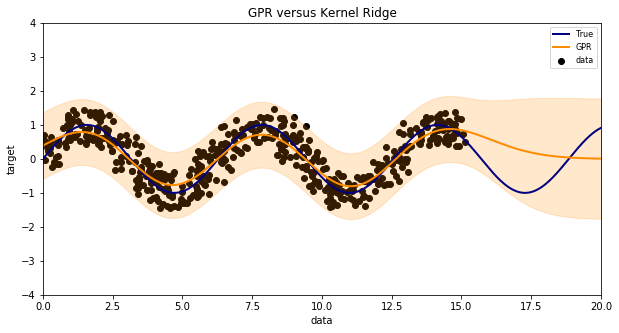

In [63]:
y_gpr, y_std = gpr_clf.predict(X_plot, return_std=True, noiseless=False)
plot_results()

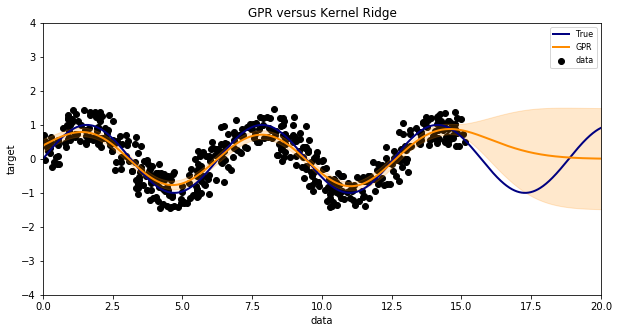

In [64]:
y_gpr, y_std = gpr_clf.predict(X_plot, return_std=True, noiseless=True)
plot_results()

### With MiniBatches

In [65]:
rng = np.random.RandomState(0)

# Generate sample data
noise = 1.0
input_noise = .3
n_train = 500
n_test = 10_000
X = 15 * rng.rand(n_train, 1)

def f(x): return np.sin(x)

y = f(X)

X += input_noise * rng.randn(X.shape[0], X.shape[1])
y += noise * (0.5 - rng.rand(X.shape[0], X.shape[1]))  # add noise
X_plot = np.linspace(0, 20, n_test)[:, None]
X_plot += input_noise * rng.randn(X_plot.shape[0], X_plot.shape[1])
X_plot = np.sort(X_plot, axis=0)

In [73]:
n_inducing = 10
inference = 'vfe'
X_variance = input_noise
verbose = 1
max_iters = 1_000
n_restarts = 10
batch_size = 10


gpr_clf = SparseGPR(
    verbose=verbose, 
    n_restarts=n_restarts,
    n_inducing=n_inducing,
    max_iters=max_iters,
    inference=inference,
    X_variance=X_variance,
    batch_size=batch_size
)

gpr_clf.fit(X, y);

Running Scaled Conjugate Gradients Code:
  runtime   i      f              |g|        
    00s06  0002   1.927013e+04   5.117865e+04 
    00s19  0007   1.852389e+04   5.117865e+04 

 /Users/eman/anaconda3/envs/sci_py36/lib/python3.6/site-packages/GPy/kern/src/psi_comp/rbf_psi_comp.py:30: RuntimeWarning:divide by zero encountered in true_divide
 /Users/eman/anaconda3/envs/sci_py36/lib/python3.6/site-packages/GPy/kern/src/psi_comp/rbf_psi_comp.py:44: RuntimeWarning:divide by zero encountered in true_divide
 /Users/eman/anaconda3/envs/sci_py36/lib/python3.6/site-packages/GPy/kern/src/psi_comp/rbf_psi_comp.py:45: RuntimeWarning:divide by zero encountered in true_divide
 /Users/eman/anaconda3/envs/sci_py36/lib/python3.6/site-packages/GPy/kern/src/psi_comp/rbf_psi_comp.py:45: RuntimeWarning:invalid value encountered in true_divide
 /Users/eman/anaconda3/envs/sci_py36/lib/python3.6/site-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in true_divide



    03s38  0040   1.250068e+04   7.677931e+05 
    04s55  0087   1.104879e+03   1.436010e+03 
    06s65  0124   6.506406e+02   1.845253e+02 
    07s66  0178   1.010725e+03   7.934351e+01 
    08s66  0239   5.669794e+02   2.936962e+00 
    10s68  0395   5.645800e+02   4.527416e-02 
    11s27  0453   5.645729e+02   2.115343e-04 
Runtime:     11s27
Optimization status: converged - relative reduction in objective

Optimization restart 1/10, f = 564.5729365362703
Optimization restart 2/10, f = 564.566227676626
Optimization restart 3/10, f = 564.5661925057925
Optimization restart 4/10, f = 564.5800011068353
Optimization restart 5/10, f = 566.9220307923225
Optimization restart 6/10, f = 564.5661553423283
Optimization restart 7/10, f = 564.5862135902371
Optimization restart 8/10, f = 564.5823645576253
Optimization restart 9/10, f = 564.5777074943511
Optimization restart 10/10, f = 564.5794919665136


In [74]:
gpr_clf.display_model()

bayesian_gplvm.,value,constraints,priors
latent space.mean,"(500, 1)",,
latent space.variance,"(500, 1)",+ve,
inducing inputs,"(10, 1)",,
rbf.variance,0.007596251828082563,+ve,
rbf.lengthscale,605.1327087258577,+ve,
Gaussian_noise.variance,0.5578150040691083,+ve,


{'inducing': <matplotlib.collections.PathCollection at 0x14110bb70>,
 'dataplot': [<matplotlib.collections.PathCollection at 0x1416450b8>],
 'input_error': [<ErrorbarContainer object of 3 artists>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x14110bfd0>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x141761780>]}

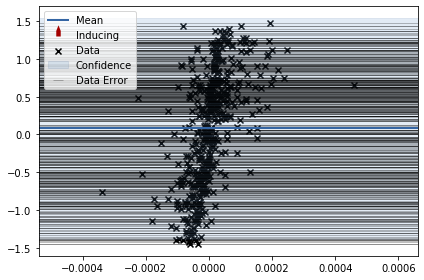

In [75]:
gpr_clf.gp_model.plot()

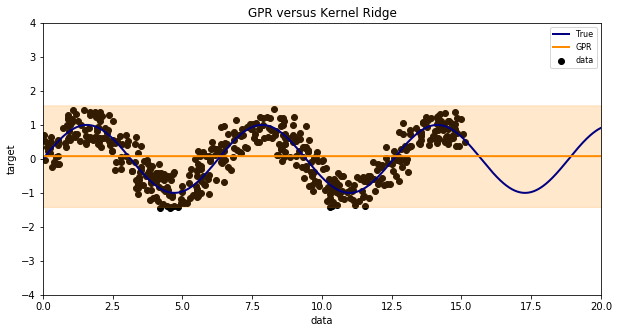

In [76]:
y_gpr, y_std = gpr_clf.predict(X_plot, return_std=True, noiseless=False)
plot_results()

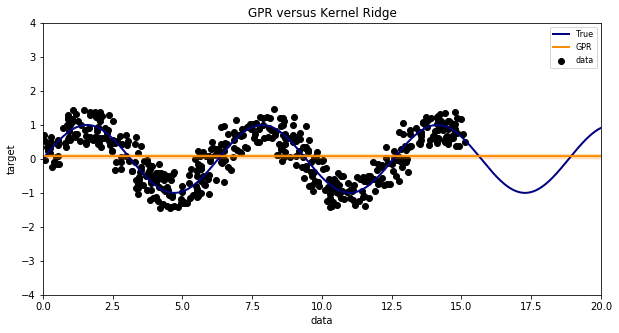

In [77]:
y_gpr, y_std = gpr_clf.predict(X_plot, return_std=True, noiseless=True)
plot_results()

In [78]:
max_iters=200
optimize=True
plot=True

Running Scaled Conjugate Gradients Code:
  runtime   i     f              |g|        
    00s14  012  -1.747661e+00   6.720894e+02 
    00s19  016  -2.726527e+00   3.744768e+02 
    00s80  156  -1.432436e+01   3.892354e-05 
Runtime:     00s80
Optimization status: converged - relative reduction in objective


Name : sparse_gp
Objective : -14.324359515247806
Number of Parameters : 10
Number of Optimization Parameters : 10
Updates : True
Parameters:
  sparse_gp.               |                 value  |  constraints  |  priors
  inducing_inputs          |                (7, 1)  |               |        
  rbf.variance             |     0.473393695277314  |      +ve      |        
  rbf.lengthscale          |    1.3280574723658873  |      +ve      |        
  Gaussian_noise.variance  |  0.002415838070167749  |      +ve      |        
Running Scaled Conjugate Gradients Code:
  runtime   i     f              |g|        
    00s11  009   1.933732e+01   2.337647e+01 
    00s19  015   1.798845e+

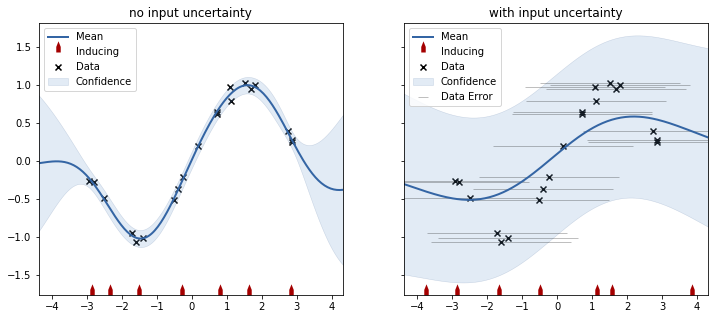

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

# sample inputs and outputs
S = np.ones((20, 1))
X = np.random.uniform(-3., 3., (20, 1))
Y = np.sin(X) + np.random.randn(20, 1) * 0.05
# likelihood = GPy.likelihoods.Gaussian(Y)
Z = np.random.uniform(-3., 3., (7, 1))

k = GPy.kern.RBF(1)
# create simple GP Model - no input uncertainty on this one
m = GPy.models.SparseGPRegression(X, Y, kernel=k, Z=Z)

if optimize:
    m.optimize('scg', messages=1, max_iters=max_iters)

if plot:
    m.plot(ax=axes[0])
    axes[0].set_title('no input uncertainty')
print(m)

# the same Model with uncertainty
m = GPy.models.SparseGPRegression(X, Y, kernel=GPy.kern.RBF(1), Z=Z, X_variance=S)
if optimize:
    m.optimize('scg', messages=1, max_iters=max_iters)
if plot:
    m.plot(ax=axes[1])
    axes[1].set_title('with input uncertainty')
    fig.canvas.draw()

print(m)